In [3]:
if 'google.colab' in str(get_ipython()):
  from google_drive_downloader import GoogleDriveDownloader as gdd
  gdd.download_file_from_google_drive(file_id='1DQ1MxklWpX0FhGaApdPjnCGIK0samO0N',
  dest_path='./boston.txt')
else:
  print('You are not using Colab. Please define working_dir with the absolute path to the folder where you downloaded the data')

# Please modify working_dir only if you are using your Anaconda (and not Google Colab)
# You should write the absolute path of your working directory with the data
Working_directory="./" 

In [1]:
import numpy as np
import pandas as pd
from time import time

from sklearn.datasets import load_boston
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import paired_distances
from sklearn.model_selection import  cross_val_score, cross_validate, GridSearchCV, KFold, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
# this is needed to plot figures within the notebook
%matplotlib inline 
np.random.seed(seed=666)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as mse
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Read data

As the data provided by sklearn is the same as the our boston data, so we just use the sklearn to read data.

In [2]:
X, y = load_boston(return_X_y=True)
feature_names = load_boston()['feature_names']
print(X.shape)
print(feature_names)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(X[:3])

[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]]


In [4]:
print(y)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

By doing some experiments, we find that the data with y=50 is outlier, so we just remove it. The experiments prove that by removing these outliers, the result improves a lot.

In [ ]:
# remove abnormal data
X = X[y!=50]
y = y[y!=50]
print(X.shape)

(490, 13)


In [ ]:
# split data into train and test dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

print(X_train.shape, X_test.shape)

(367, 13) (123, 13)


# Preprocessing

## Scale data

for some methods, it's necessary to scale the data

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

## Feature selections

If we use some traditional ML methods, it's important to reduce the dimension by removing most nuisance variables

This time, the original number of feature is rather small, so we can also try some methods like sequential feature selection which is slow but can better selet the features.

### PCA

The simplest way is to apply PCA to select features

In [ ]:
pca = PCA(n_components=10,svd_solver='randomized', whiten=True)
pca.fit(X_train_scale)

X_train_pca = pca.transform(X_train_scale)
X_test_pca = pca.transform(X_test_scale)
print(np.sum(pca.explained_variance_ratio_))

0.9680020758832637


### Random Forest

We can also use RF to select important features

In [ ]:
n_component = 8

model = RandomForestRegressor(n_jobs=8, random_state=0)
model.fit(X_train_scale, y_train.ravel())

feature_importance = model.feature_importances_

index = np.argsort(feature_importance)[-1:-n_component-1:-1]

X_train_RF = X_train_scale[:, index]
X_test_RF = X_test_scale[:, index]

print(np.sum(feature_importance[index]))
print(feature_names[index])

0.9693313959996135
['RM' 'LSTAT' 'CRIM' 'DIS' 'NOX' 'PTRATIO' 'TAX' 'AGE']


### Sequential Feature Selection

This time, the number of feature is much smller than the 2 datasets before, so we can use some method like SFS to better select the features.

In [ ]:
# Build RF regressor to use in feature selection
clf = RandomForestRegressor(n_jobs=8)

# Sequential Forward Selection
sfs = SFS(clf,
      k_features=8, 
      forward=True,
      floating=False,
      verbose=2,
      scoring='neg_mean_squared_error',
      cv=5, n_jobs = 8)

sfs = sfs.fit(X_train_scale, y_train)

print('\nSequential Forward Selection (k=8):')
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   5 out of  13 | elapsed:    4.1s remaining:    6.6s
[Parallel(n_jobs=8)]: Done  13 out of  13 | elapsed:    8.8s finished

[2021-04-05 20:32:20] Features: 1/8 -- score: -29.18722485030973[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   4 out of  12 | elapsed:    4.0s remaining:    8.1s
[Parallel(n_jobs=8)]: Done  12 out of  12 | elapsed:    9.0s finished

[2021-04-05 20:32:29] Features: 2/8 -- score: -16.250463812143668[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of  11 | elapsed:    3.8s remaining:   17.2s
[Parallel(n_jobs=8)]: Done   8 out of  11 | elapsed:    8.6s remaining:    3.2s
[Parallel(n_jobs=8)]: Done  11 out of  11 | elapsed:    9.0s finished

[2021-04-05 20:32:38] Features: 3/8 -- score: -11.814402213513523[Parallel(n_jobs=8)]: Using backend LokyBackend 


Sequential Forward Selection (k=8):
(0, 4, 5, 6, 8, 9, 10, 12)
CV Score:
-9.752085069270644


[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    6.9s finished

[2021-04-05 20:33:17] Features: 8/8 -- score: -9.752085069270644

In [ ]:
print(feature_names[list(sfs.k_feature_idx_)])

X_train_sfs = X_train_scale[:,sfs.k_feature_idx_]
X_test_sfs = X_test_scale[:,sfs.k_feature_idx_]

['CRIM' 'NOX' 'RM' 'AGE' 'RAD' 'TAX' 'PTRATIO' 'LSTAT']


# Regressor

## SVM

We try SVM first, because it's a rather simple but useful regressor

In [ ]:
p_grid_lsvm = {'C': [1e-3,1e-2,0.05,1e-1,0.5,1,2,5,1e1,1e2,15,20,40,60,80,120,140]}
Lsvm = SVR(kernel='rbf')
grid_lsvm = GridSearchCV(estimator=Lsvm, param_grid=p_grid_lsvm, scoring='neg_mean_squared_error', cv=5, n_jobs=8)

We try SVM on different preprocessed data to compare the performances.

### Scaled data

In [ ]:
grid_lsvm.fit(X_train_scale, y_train.ravel())
test_score = grid_lsvm.score(X_test_scale, y_test.ravel())

print("Best training Score: {}".format(grid_lsvm.best_score_))
print("Best training params: {}".format(grid_lsvm.best_params_))
print("Test score: {}".format(test_score))

Best training Score: -8.644099683160372
Best training params: {'C': 15}
Test score: -7.790827595707019


### PCA preprocessed data

In [ ]:
grid_lsvm.fit(X_train_pca, y_train.ravel())
test_score = grid_lsvm.score(X_test_pca, y_test.ravel())

print("Best training Score: {}".format(grid_lsvm.best_score_))
print("Best training params: {}".format(grid_lsvm.best_params_))
print("Test score: {}".format(test_score))

Best training Score: -10.905250625912615
Best training params: {'C': 40}
Test score: -8.567819003996398


### RF preprocessed data

In [ ]:
grid_lsvm.fit(X_train_RF, y_train.ravel())
test_score = grid_lsvm.score(X_test_RF, y_test.ravel())

print("Best training Score: {}".format(grid_lsvm.best_score_))
print("Best training params: {}".format(grid_lsvm.best_params_))
print("Test score: {}".format(test_score))

Best training Score: -8.073225870284762
Best training params: {'C': 15}
Test score: -7.6702654820761955


### SFS preprocessed data

In [ ]:
grid_lsvm.fit(X_train_sfs, y_train.ravel())
test_score = grid_lsvm.score(X_test_sfs, y_test.ravel())

print("Best training Score: {}".format(grid_lsvm.best_score_))
print("Best training params: {}".format(grid_lsvm.best_params_))
print("Test score: {}".format(test_score))

Best training Score: -8.244137699294537
Best training params: {'C': 15}
Test score: -7.796078405261998


### Comments

From these results, we can find that RF preprocessed data can have the best performance. Even though it doesn't increase many scores, it decreases the number of features and decreases the calculation time.

## Boost

In [ ]:
XGB = XGBRegressor()
p_grid_xgb = dict(
    max_depth = [4, 5, 6, 7],
    learning_rate = np.linspace(0.03, 0.3, 10),
    n_estimators = [100, 200]
)

grid_xgb = GridSearchCV(estimator=XGB, param_grid=p_grid_xgb, scoring='neg_mean_squared_error', cv=5, n_jobs = 8)

### Scaled data

In [ ]:
grid_xgb.fit(X_train_scale, y_train.ravel())
test_score = grid_xgb.score(X_test_scale, y_test.ravel())

print("Best training Score: {}".format(grid_xgb.best_score_))
print("Best training params: {}".format(grid_xgb.best_params_))
print("Test score: {}".format(test_score))

[20:29:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best training Score: -8.306967583987895
Best training params: {'learning_rate': 0.06, 'max_depth': 4, 'n_estimators': 200}
Test score: -5.920588723795166


### PCA preprocessed data

In [ ]:
grid_xgb.fit(X_train_pca, y_train.ravel())
test_score = grid_xgb.score(X_test_pca, y_test.ravel())

print("Best training Score: {}".format(grid_xgb.best_score_))
print("Best training params: {}".format(grid_xgb.best_params_))
print("Test score: {}".format(test_score))

[20:29:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best training Score: -10.62773985893026
Best training params: {'learning_rate': 0.15000000000000002, 'max_depth': 4, 'n_estimators': 200}
Test score: -10.144158993409846


### RF preprocessed data

In [ ]:
grid_xgb.fit(X_train_RF, y_train.ravel())
test_score = grid_xgb.score(X_test_RF, y_test.ravel())

print("Best training Score: {}".format(grid_xgb.best_score_))
print("Best training params: {}".format(grid_xgb.best_params_))
print("Test score: {}".format(test_score))

[20:30:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best training Score: -8.031270566213113
Best training params: {'learning_rate': 0.09, 'max_depth': 4, 'n_estimators': 200}
Test score: -6.37492299742967


### SFS preprocessed data

In [ ]:
grid_xgb.fit(X_train_sfs, y_train.ravel())
test_score = grid_xgb.score(X_test_sfs, y_test.ravel())

print("Best training Score: {}".format(grid_xgb.best_score_))
print("Best training params: {}".format(grid_xgb.best_params_))
print("Test score: {}".format(test_score))

[20:34:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best training Score: -7.741432482804453
Best training params: {'learning_rate': 0.09, 'max_depth': 4, 'n_estimators': 200}
Test score: -6.671467792686729


### Comments

The result on the scaled data has the best MSE score. Maybe for this dataset and for XGBoosting regressor, it's not necessary to select the features

We also find that the performance of boosting is much better than SVM, because it's an ensemble method, so in general, if we choose a suitable hyperparameter, the result can be very good.

## MLP from tensorflow

As the experiments on 2 other datasets shows, the MLP implemented by tensorflow will have a better performance than that implemented by sklearn, so this time, I just directly implement the MLP by tensorflow.

Code is modified from the TP of our image course

In [ ]:
import tensorflow as tf

# import tensorflow models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
print(tf.keras.__version__)

2.4.0


Training
Epoch 1/100
5/5 [==============================] - 1s 50ms/step - loss: 538.7790 - val_loss: 434.4614
Epoch 2/100
5/5 [==============================] - 0s 13ms/step - loss: 418.4629 - val_loss: 258.6630
Epoch 3/100
5/5 [==============================] - 0s 13ms/step - loss: 333.3004 - val_loss: 149.6043
Epoch 4/100
5/5 [==============================] - 0s 12ms/step - loss: 276.0273 - val_loss: 144.0690
Epoch 5/100
5/5 [==============================] - 0s 12ms/step - loss: 209.7179 - val_loss: 175.0184
Epoch 6/100
5/5 [==============================] - 0s 12ms/step - loss: 156.7851 - val_loss: 183.8345
Epoch 7/100
5/5 [==============================] - 0s 13ms/step - loss: 94.5045 - val_loss: 166.2575
Epoch 8/100
5/5 [==============================] - 0s 14ms/step - loss: 59.9137 - val_loss: 148.3298
Epoch 9/100
5/5 [==============================] - 0s 12ms/step - loss: 30.6672 - val_loss: 187.3999
Epoch 10/100
5/5 [==============================] - 0s 13ms/step - loss: 13.

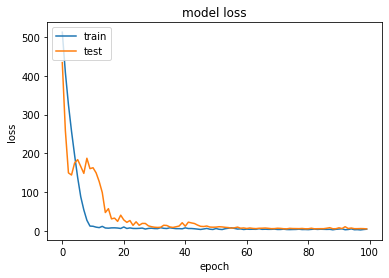

Testing
4/4 - 0s - loss: 4.8147


4.814663410186768

In [ ]:
# Network Parameters
n_hidden_1 = 128 # 1st layer number of neurons
n_hidden_2 = 128 # 2nd layer number of neurons
n_hidden_3 = 64 # 2nd layer number of neurons

n_input = X_train.shape[1]

# TO CODE BY STUDENTS

model_mlp_multi_layer = Sequential()   # FILL IN STUDENTS
model_mlp_multi_layer.add(Dense(n_hidden_1, input_shape=(n_input,)))
model_mlp_multi_layer.add(BatchNormalization())
model_mlp_multi_layer.add(Activation('relu'))
model_mlp_multi_layer.add(Dense(n_hidden_2))
model_mlp_multi_layer.add(BatchNormalization())
model_mlp_multi_layer.add(Activation('relu'))
model_mlp_multi_layer.add(Dense(n_hidden_3))
model_mlp_multi_layer.add(BatchNormalization())
model_mlp_multi_layer.add(Activation('relu'))
model_mlp_multi_layer.add(Dense(1))

# create the loss and optimiser
learning_rate = 0.01
model_mlp_multi_layer.compile(loss="mse", optimizer=optimizers.Adam(lr=learning_rate))

# Run optimisation algorithm
n_epochs = 100
batch_size = 64

print('Training')
history = model_mlp_multi_layer.fit(X_train_scale, y_train, epochs=n_epochs,batch_size=batch_size, validation_split=0.2) # TO FILL IN

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('Testing')
model_mlp_multi_layer.evaluate(X_test_scale,  y_test, verbose=2) # TO FILL IN

The best result of MLP is much better than the others methods, and I think the main reason is that MLP can better handle the complexe dataset, because it has so many parameters to train. However, the variance of this method is also very large, and the result varies a lot.

# Conlusion

In this dataset, the MLP method get the best result which is 4.81 mesured by mse. I think this is because regression is much harder task than classification, and we need a more complexe model to get a good result.

Interesting thing is the best models in our 3 datasets are very different:

- Quick draw: CNN
- Action recognition: Boosting
- Boston pricing: MLP

Therefore, it's hard to say which method is always the best, because the datasets are very different, and the best model really depends on the data. 